In [0]:
#importing the libraries we need 
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
import pylab as pl
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
   #load our data  
    from google.colab import files #we use google colab packege to upload our data
    uploaded = files.upload()      
    df = pd.read_csv("kidney_disease.csv")
    df.head()

Saving kidney_disease.csv to kidney_disease (1).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
#geting our data how many rows and homany coloms
df.shape

(400, 26)

In [0]:
#creating a list of our coloms

columns_to_retain = ["age","bp","sg", "al","su","bgr","bu", "sc","sod", "hemo",
                         "pcv", "wc", "rc", "htn","dm","cad","pe","ane", "classification"]

#columns to use and drop the columns that are not using
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# drop the rows with na or missing values
df = df.dropna(axis=0)
    


In [0]:
#change non numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [11]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,hemo,pcv,wc,rc,htn,dm,cad,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,11.2,12,47,15,1,0,0,1,1,0
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,1.1,142.0,12.2,19,57,20,1,1,0,1,0,0
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,9.5,9,13,13,1,1,0,0,1,0
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,10.8,12,30,14,1,1,0,1,0,0
12,68.0,70.0,1.015,3.0,1.0,208.0,72.0,2.1,138.0,9.7,8,14,10,1,1,1,1,0,0


In [0]:
#split our data
X = df.drop(["classification"], axis=1)
y = df["classification"]

In [0]:
#Scaling our data
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [0]:
#split the data into 80% training and 20% testing 
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.2, shuffle=True)

In [15]:
len(X.columns)

18

In [0]:
#Building our Artificial nural network  model
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),
kernel_initializer=k.initializers.random_uniform(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [0]:
#Compiling our  model
model.compile(loss='binary_crossentropy', 
optimizer='adam', metrics=['accuracy'])

In [20]:
#Training our  model
history = model.fit(X_train, y_train, 
                    epochs=2000, 
                    batch_size=X_train.shape[0]) 




Epoch 1/2000





160/160 [==============================] - 0s 2ms/step - loss: 0.6872 - acc: 0.6062
Epoch 2/2000
160/160 [==============================] - 0s 21us/step - loss: 0.6699 - acc: 0.6125
Epoch 3/2000
160/160 [==============================] - 0s 16us/step - loss: 0.6532 - acc: 0.6500
Epoch 4/2000
160/160 [==============================] - 0s 13us/step - loss: 0.6371 - acc: 0.7188
Epoch 5/2000
160/160 [==============================] - 0s 16us/step - loss: 0.6213 - acc: 0.7688
Epoch 6/2000
160/160 [==============================] - 0s 15us/step - loss: 0.6060 - acc: 0.7750
Epoch 7/2000
160/160 [==============================] - 0s 13us/step - loss: 0.5908 - acc: 0.7875
Epoch 8/2000
160/160 [==============================] - 0s 15us/step - loss: 0.5760 - acc: 0.8062
Epoch 9/2000
160/160 [==============================] - 0s 14us/step - loss: 0.5614 - acc: 0.8188
Epoch 10/2000
160/160 [==============================] - 0s 12us/step - loss: 0.5472 - acc: 0.8250
Epoch 11/200

In [0]:
#Saving  the model
model.save("brwaModel.model")

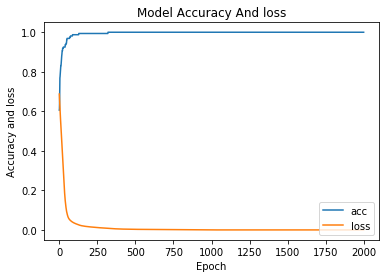

In [22]:
#Visualizing the model accuracy and loss
plt.plot(history.history["acc"])
plt.plot(history.history["loss"])
plt.title("Model Accuracy And loss")
plt.ylabel("Accuracy and loss")
plt.xlabel("Epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [23]:
print("---------------------------------------------------------")
print("Shape of training data: ", X_train.shape)
print("Shape of test data    : ", X_test.shape )
print("---------------------------------------------------------")

---------------------------------------------------------
Shape of training data:  (160, 18)
Shape of test data    :  (40, 18)
---------------------------------------------------------


In [24]:
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()

Model file:  brwaModel.model
40/40 [==============================] - 0s 1ms/step

Original  : 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0

Predicted : 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0

Scores    : loss =  0.00484865065664053  acc =  1.0
---------------------------------------------------------

